In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df= pd.read_csv('bank-additional-full.csv', sep=';', encoding='utf-8')
# Results for all clients
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


There are 41,188 clients who have been contacted.

In [2]:
# Dropping unnecessary columns
df=df.drop('emp.var.rate',axis=1)
df=df.drop('cons.price.idx',axis=1)
df=df.drop('cons.conf.idx',axis=1)
df=df.drop('euribor3m',axis=1)
df=df.drop('nr.employed',axis=1)
# df['pdays']=df['pdays'].replace(999,0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


In [3]:
df.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [37]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

Average number of contacts: Current campaign = 2-3, Previous campaign = 0 meaning for current campaign, majority have not been contacted in previous campaign = 35563/41188 = 86.34%


In [42]:
#Analyse previous campaign
#Remove all entries who were not contacted in previous campaign
df_previous=df[df['poutcome']!='nonexistent']
df_previous

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,39,1,999,1,failure,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,449,1,999,1,failure,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,114,1,999,1,failure,yes
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,119,1,6,1,success,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,no
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,no


Success rate of previous campaign = 32.29%

In [53]:
#Analyse success factors
df_previous_job=df_previous.groupby('job')['poutcome'].value_counts().unstack()
df_previous_job['success_rate']=df_previous_job['success']/(df_previous_job['success']+df_previous_job['failure'])
df_previous_job

poutcome,failure,success,success_rate
job,,,
admin.,1091,428,0.281764
blue-collar,886,119,0.118408
entrepreneur,154,25,0.139665
housemaid,74,38,0.339286
management,331,95,0.223005
retired,230,158,0.407216
self-employed,145,30,0.171429
services,448,70,0.135135
student,163,118,0.419929


Top 3 jobs with highest success rates = student (41.99%), retired (40.72%), unemployed (39.74%)
Top 3 jobs with most successes = admin. (428), technician (211), retired (158)

In [48]:
#Conversion rate (previous campaign = failure, current campaign = success)
df_converted=df_previous[df_previous['poutcome']=='failure']
df_converted=df_converted[df_converted['y']=='yes']
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 24019 to 41173
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          605 non-null    int64 
 1   job          605 non-null    object
 2   marital      605 non-null    object
 3   education    605 non-null    object
 4   default      605 non-null    object
 5   housing      605 non-null    object
 6   loan         605 non-null    object
 7   contact      605 non-null    object
 8   month        605 non-null    object
 9   day_of_week  605 non-null    object
 10  duration     605 non-null    int64 
 11  campaign     605 non-null    int64 
 12  pdays        605 non-null    int64 
 13  previous     605 non-null    int64 
 14  poutcome     605 non-null    object
 15  y            605 non-null    object
dtypes: int64(5), object(11)
memory usage: 80.4+ KB


Conversion rate of current campaign = 605/4252 = 14.23%

In [54]:
#Loss rate (previous campaign = success, current campaign = failure)
df_loss=df_previous[df_previous['poutcome']=='success']
df_loss=df_loss[df_loss['y']=='no']
df_loss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 24108 to 41182
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          479 non-null    int64 
 1   job          479 non-null    object
 2   marital      479 non-null    object
 3   education    479 non-null    object
 4   default      479 non-null    object
 5   housing      479 non-null    object
 6   loan         479 non-null    object
 7   contact      479 non-null    object
 8   month        479 non-null    object
 9   day_of_week  479 non-null    object
 10  duration     479 non-null    int64 
 11  campaign     479 non-null    int64 
 12  pdays        479 non-null    int64 
 13  previous     479 non-null    int64 
 14  poutcome     479 non-null    object
 15  y            479 non-null    object
dtypes: int64(5), object(11)
memory usage: 63.6+ KB


Loss rate of current campaign = 479/1373 = 34.89%

In [56]:
#Return rate (previous campaign = success, current campaign = success)
df_return=df_previous[df_previous['poutcome']=='success']
df_return=df_return[df_return['y']=='yes']
df_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 24613 to 41178
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          894 non-null    int64 
 1   job          894 non-null    object
 2   marital      894 non-null    object
 3   education    894 non-null    object
 4   default      894 non-null    object
 5   housing      894 non-null    object
 6   loan         894 non-null    object
 7   contact      894 non-null    object
 8   month        894 non-null    object
 9   day_of_week  894 non-null    object
 10  duration     894 non-null    int64 
 11  campaign     894 non-null    int64 
 12  pdays        894 non-null    int64 
 13  previous     894 non-null    int64 
 14  poutcome     894 non-null    object
 15  y            894 non-null    object
dtypes: int64(5), object(11)
memory usage: 118.7+ KB


Return rate of current campaign = 894/1373 = 65.11%

In [57]:
#Double failure rate (previous campaign = failure, current campaign = failure)
df_double_fail=df_previous[df_previous['poutcome']=='failure']
df_double_fail=df_double_fail[df_double_fail['y']=='yes']
df_double_fail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 24019 to 41173
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          605 non-null    int64 
 1   job          605 non-null    object
 2   marital      605 non-null    object
 3   education    605 non-null    object
 4   default      605 non-null    object
 5   housing      605 non-null    object
 6   loan         605 non-null    object
 7   contact      605 non-null    object
 8   month        605 non-null    object
 9   day_of_week  605 non-null    object
 10  duration     605 non-null    int64 
 11  campaign     605 non-null    int64 
 12  pdays        605 non-null    int64 
 13  previous     605 non-null    int64 
 14  poutcome     605 non-null    object
 15  y            605 non-null    object
dtypes: int64(5), object(11)
memory usage: 80.4+ KB


In [ ]:
Double failure rate of current campaign = 605/4252 = 14.23%

In [6]:
df_age_count=df['age'].value_counts()
df_age_count.head(20).sort_index()

age
28    1001
29    1453
30    1714
31    1947
32    1846
33    1833
34    1745
35    1759
36    1780
37    1475
38    1407
39    1432
40    1161
41    1278
42    1142
43    1055
44    1011
45    1103
46    1030
48     979
Name: count, dtype: int64

In [7]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [8]:
df_admin=df[df['job'] == 'admin.']
df_admin2=df_admin[df_admin['y']=='yes']
df_admin2.describe()

,age,duration,campaign,pdays,previous
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,37.968935,517.414201,2.058432,773.512574,0.510355
std,10.057521,375.292827,1.712147,416.174946,0.870546
min,21.000000,64.000000,1.000000,0.000000,0.000000
25%,30.000000,245.000000,1.000000,999.000000,0.000000
50%,35.000000,409.500000,1.000000,999.000000,0.000000
75%,45.000000,687.250000,2.000000,999.000000,1.000000
max,72.000000,2692.000000,17.000000,999.000000,6.000000


In [9]:
df_technician=df[df['job'] == 'technician']
df_technician2=df_technician[df_technician['y']=='yes']
df_technician2.describe()

,age,duration,campaign,pdays,previous
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,37.746575,553.190411,2.046575,793.676712,0.505479
std,9.281168,380.371713,1.588892,402.339117,0.856251
min,20.000000,63.000000,1.000000,0.000000,0.000000
25%,31.000000,259.250000,1.000000,999.000000,0.000000
50%,35.000000,459.500000,2.000000,999.000000,0.000000
75%,43.000000,748.000000,2.000000,999.000000,1.000000
max,70.000000,3643.000000,17.000000,999.000000,5.000000


In [10]:
df_bluecollar=df[df['job'] == 'blue-collar']
df_bluecollar2=df_bluecollar[df_bluecollar['y']=='yes']
df_bluecollar2.describe()

,age,duration,campaign,pdays,previous
count,638.000000,638.000000,638.000000,638.000000,638.000000
mean,39.200627,732.673981,2.156740,899.324451,0.269592
std,9.516764,442.963058,1.977235,298.742566,0.610775
min,21.000000,78.000000,1.000000,2.000000,0.000000
25%,32.000000,414.250000,1.000000,999.000000,0.000000
50%,38.000000,664.000000,2.000000,999.000000,0.000000
75%,46.000000,943.750000,3.000000,999.000000,0.000000
max,70.000000,4199.000000,23.000000,999.000000,4.000000


In [11]:
df_age=df[df['age']>=26]
df_age=df_age[df_age['age']<35]
df_age=df_age[df_age['y']=='yes']
df_age.describe()

,age,duration,campaign,pdays,previous
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,30.404323,553.474889,2.055944,814.007629,0.433566
std,2.432400,405.657855,1.613610,386.782077,0.808002
min,26.000000,37.000000,1.000000,0.000000,0.000000
25%,29.000000,251.000000,1.000000,999.000000,0.000000
50%,31.000000,449.000000,2.000000,999.000000,0.000000
75%,33.000000,740.000000,3.000000,999.000000,1.000000
max,34.000000,3643.000000,17.000000,999.000000,5.000000


In [12]:
# Results for all subscribers
df_y=df[df['y'] == 'yes']
df_y

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes


There are 4640 clients who subscribed for the term deposit.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/4133574244.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=job_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


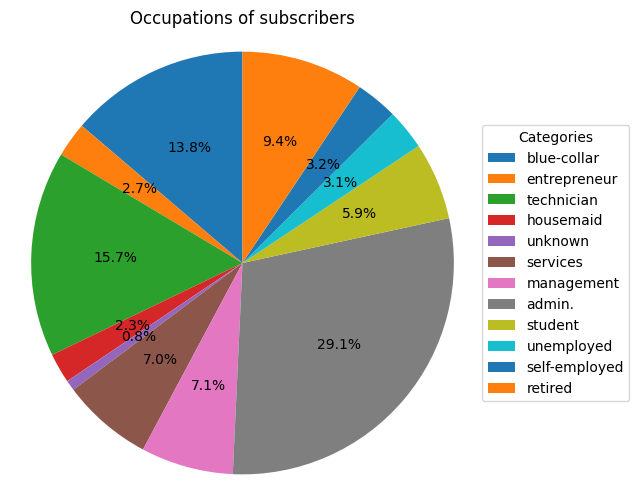

In [13]:
job_y_count=Counter(df_y['job'])
job_y_count
job_y_label = list(job_y_count.keys())
job_y_size = list(job_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(job_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=job_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Occupations of subscribers')
plt.axis('equal')
plt.show()

Top 3 occupations of subscribers: 29.1% Admin, 15.7% Technician, 13.8% Blue-collar

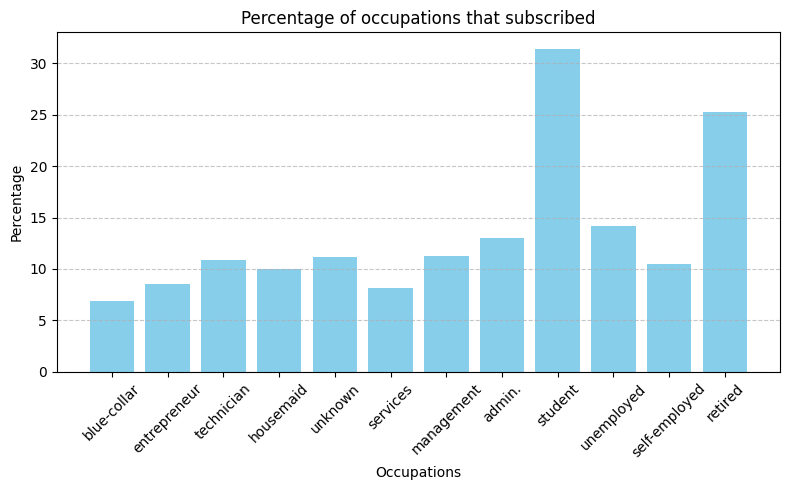

In [14]:
job_count2=Counter(df['job'])
job_count2
job_percentage = {
    key: job_y_count[key] / job_count2[key] * 100 
    for key in job_y_count 
    if key in job_count2 and job_count2[key] != 0
}

labels = list(job_percentage.keys())
values = list(job_percentage.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Percentage of occupations that subscribed')
plt.xlabel('Occupations')
plt.ylabel('Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Students (31%) and retired clients (25%) are more likely to subscribe.

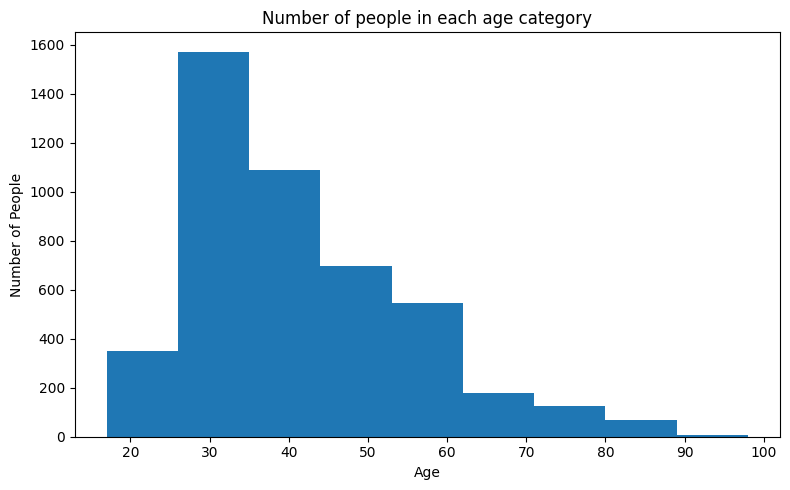

In [15]:
salaries_y=df_y['age']
plt.figure(figsize = (8,5))
plt.hist(salaries_y, bins = 9)
plt.title('Number of people in each age category')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

Highest number of subscribers are between ages 26-35, followed by ages 35-44 and ages 44-53.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/1307783306.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=housing_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


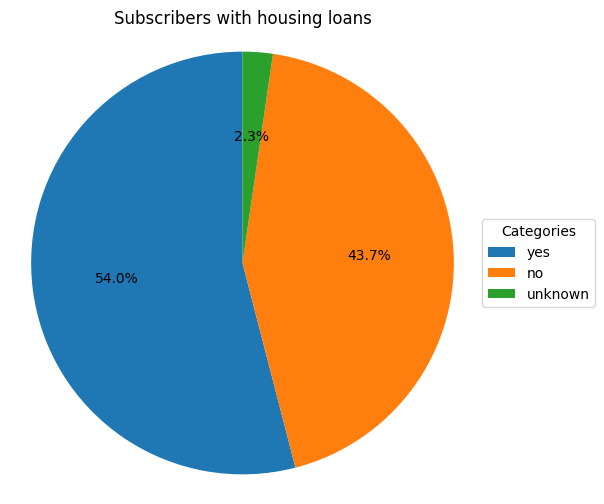

In [16]:
housing_y_count=Counter(df_y['housing'])
housing_y_count
housing_y_label = list(housing_y_count.keys())
housing_y_size = list(housing_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(housing_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=housing_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Subscribers with housing loans')
plt.axis('equal')
plt.show()

More than half of subscribers have housing loans. Housing loan is not a determining factor that influences the outcome.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/2738049858.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=loan_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


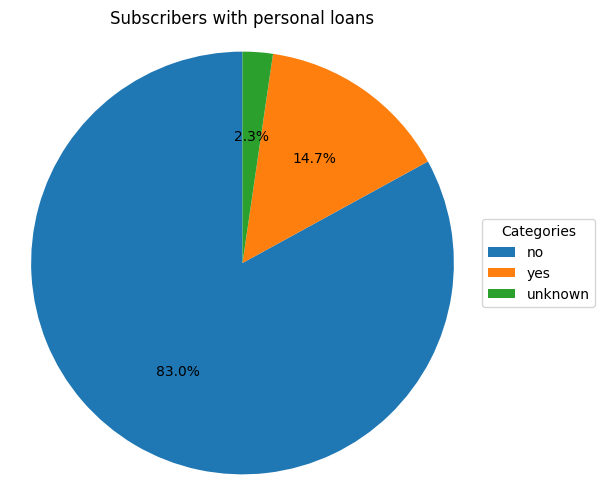

In [17]:
loan_y_count=Counter(df_y['loan'])
loan_y_count
loan_y_label = list(loan_y_count.keys())
loan_y_size = list(loan_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(loan_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=loan_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Subscribers with personal loans')
plt.axis('equal')
plt.show()

Majority of subscribers do not have personal loans. This indicates that there is a high chance of success if the client does not have a personal loan.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/3559376009.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=marital_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


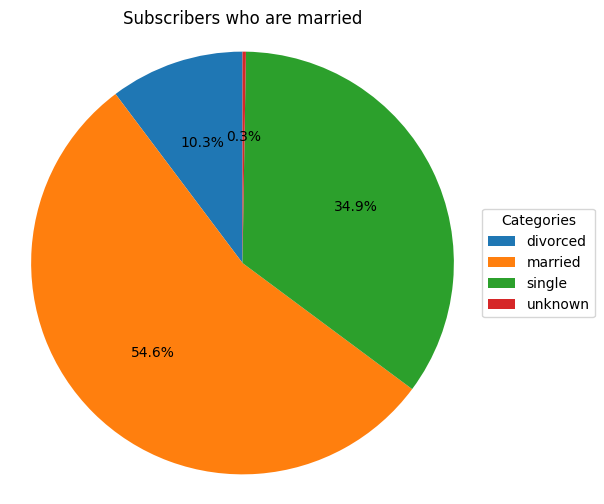

In [18]:
marital_y_count=Counter(df_y['marital'])
marital_y_count
marital_y_label = list(marital_y_count.keys())
marital_y_size = list(marital_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(marital_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=marital_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Subscribers who are married')
plt.axis('equal')
plt.show()

More than half of the subscribers are married.

In [19]:
df.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


Average duration of successful call was 258 seconds or 4.3 minutes. Any calls longer or shorter than this will decrease the success rate.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/2706285101.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=education_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


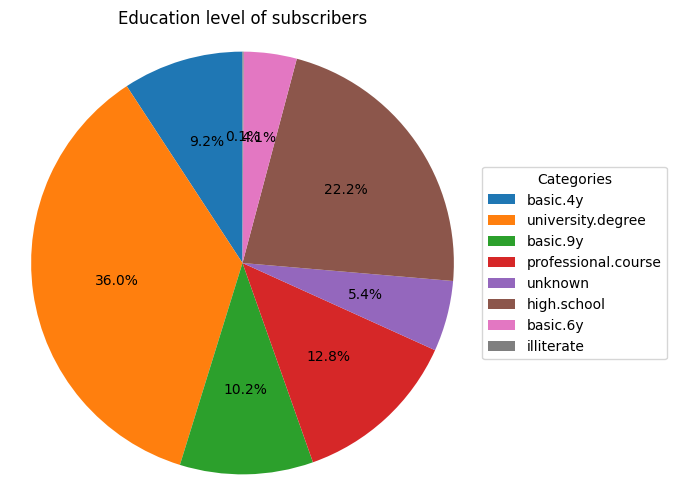

In [20]:
education_y_count=Counter(df_y['education'])
education_y_count
education_y_label = list(education_y_count.keys())
education_y_size = list(education_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(education_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=education_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Education level of subscribers')
plt.axis('equal')
plt.show()

36% of subscribers have a university degree, 22.2% are from high school, 12.8% have done a professional course. 

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/1771009063.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=campaign_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


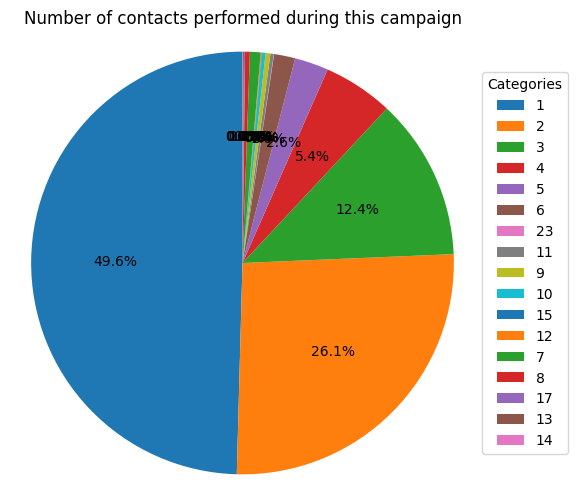

In [21]:
campaign_y_count=Counter(df_y['campaign'])
campaign_y_count
campaign_y_label = list(campaign_y_count.keys())
campaign_y_size = list(campaign_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(campaign_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=campaign_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Number of contacts performed during this campaign')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/3030687491.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=pdays_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


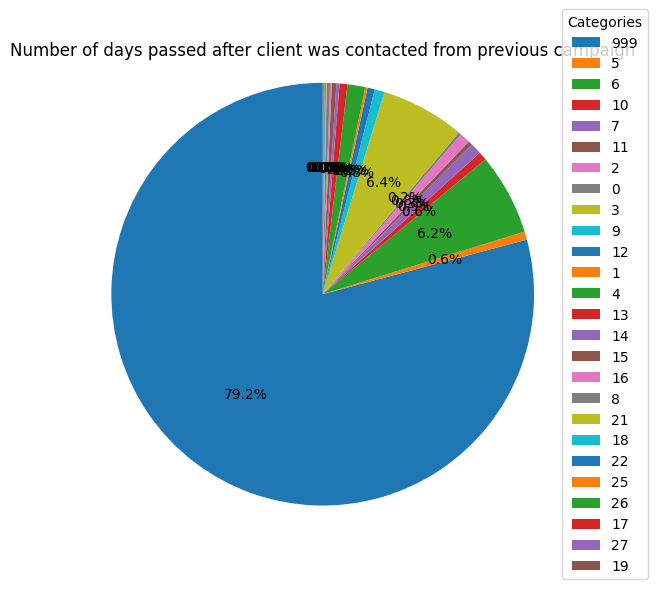

In [22]:
pdays_y_count=Counter(df_y['pdays'])
pdays_y_count
pdays_y_label = list(pdays_y_count.keys())
pdays_y_size = list(pdays_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(pdays_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=pdays_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Number of days passed after client was contacted from previous campaign')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/1490381578.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=previous_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


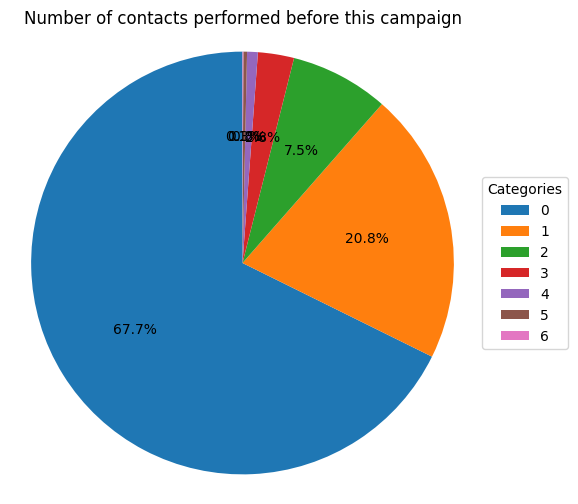

In [23]:
previous_y_count=Counter(df_y['previous'])
previous_y_count
previous_y_label = list(previous_y_count.keys())
previous_y_size = list(previous_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(previous_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=previous_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Number of contacts performed before this campaign')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/3363196064.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=poutcome_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


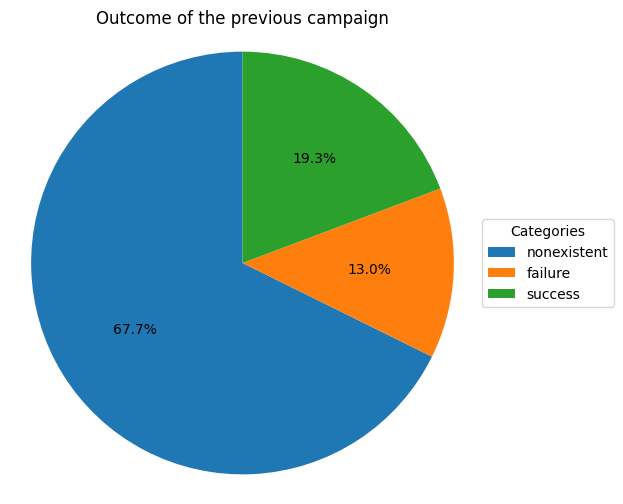

In [24]:
poutcome_y_count=Counter(df_y['poutcome'])
poutcome_y_count
poutcome_y_label = list(poutcome_y_count.keys())
poutcome_y_size = list(poutcome_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(poutcome_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=poutcome_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Outcome of the previous campaign')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/593639871.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=default_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


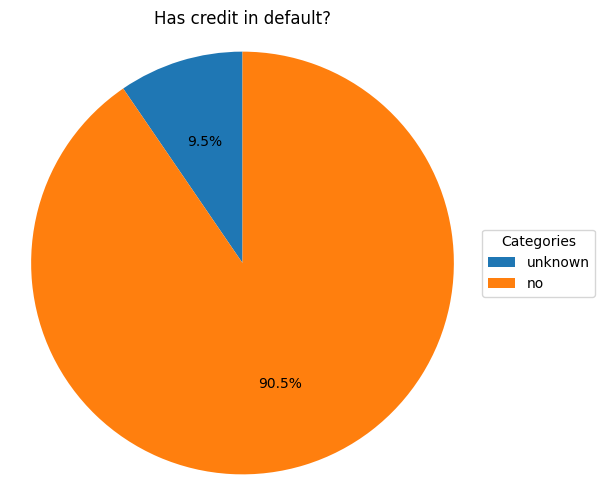

In [25]:
default_y_count=Counter(df_y['default'])
default_y_count
default_y_label = list(default_y_count.keys())
default_y_size = list(default_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(default_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=default_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Has credit in default?')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/1494016507.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=contact_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


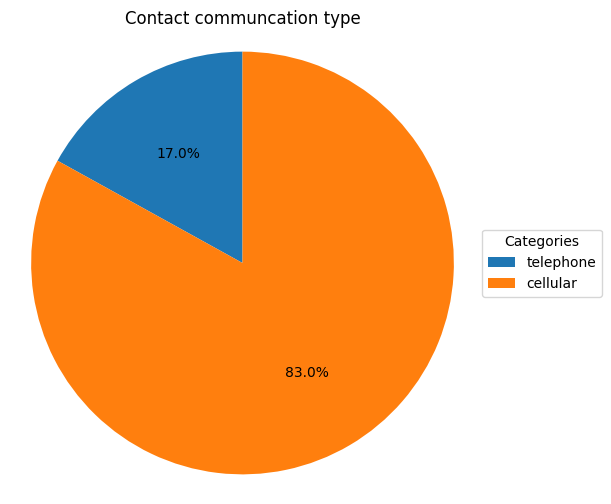

In [26]:
contact_y_count=Counter(df_y['contact'])
contact_y_count
contact_y_label = list(contact_y_count.keys())
contact_y_size = list(contact_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(contact_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=contact_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Contact communcation type')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/1718210502.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels= month_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


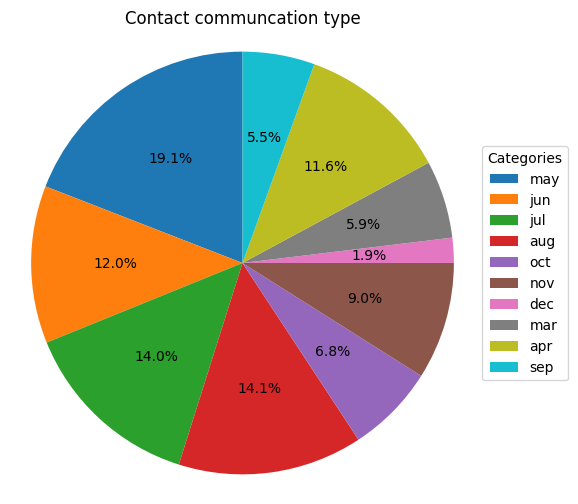

In [27]:
month_y_count=Counter(df_y['month'])
month_y_count
month_y_label = list(month_y_count.keys())
month_y_size = list(month_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(month_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels= month_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Contact communcation type')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_2083/1803494942.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=day_of_week_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


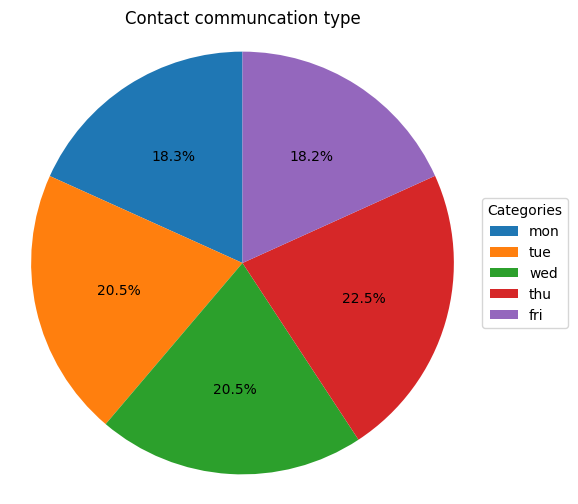

In [28]:
day_of_week_y_count=Counter(df_y['day_of_week'])
day_of_week_y_count
day_of_week_y_label = list(day_of_week_y_count.keys())
day_of_week_y_size = list(day_of_week_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(day_of_week_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=day_of_week_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Contact communcation type')
plt.axis('equal')
plt.show()

In [29]:
df2=df.copy()
df2=df2.drop('day_of_week',axis=1)
df2

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,yes


In [30]:
job_encoder= {'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5, 'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11, 'unknown':0}
df2['job'] = df2['job'].map(job_encoder)
marital_encoder= {'divorced': 3, 'married': 2, 'single': 1, 'unknown': 0}
df2['marital'] = df2['marital'].map(marital_encoder)
education_encoder= {'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'illiterate': -1, 'professional.course': 5, 'university.degree': 6, 'unknown': 0}
df2['education'] = df2['education'].map(education_encoder)
df2['default'] = df2['default'].map({'yes': 1, 'no': -1, 'unknown': 0})
df2['housing'] = df2['housing'].map({'yes': 1, 'no': -1, 'unknown': 0})
df2['loan'] = df2['loan'].map({'yes': 1, 'no': -1, 'unknown': 0})
df2['contact'] = df2['contact'].map({'cellular': 2, 'telephone': 1, 'unknown': 0})
month_encoder= {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12, 'unknown': 0}
df2['month'] = df2['month'].map(month_encoder)
df2['poutcome'] = df2['poutcome'].map({'failure': -1, 'success': 1, 'nonexistent':2, 'unknown': 0})
df2['y'] = df2['y'].map({'yes': 1, 'no': -1, 'unknown': 0})
df2

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,56,4,2,1,-1,-1,-1,1,5,261,1,999,0,2,-1
1,57,8,2,4,0,-1,-1,1,5,149,1,999,0,2,-1
2,37,8,2,4,-1,1,-1,1,5,226,1,999,0,2,-1
3,40,1,2,2,-1,-1,-1,1,5,151,1,999,0,2,-1
4,56,8,2,4,-1,-1,1,1,5,307,1,999,0,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,5,-1,1,-1,2,11,334,1,999,0,2,1
41184,46,2,2,5,-1,-1,-1,2,11,383,1,999,0,2,-1
41185,56,6,2,6,-1,1,-1,2,11,189,2,999,0,2,-1
41186,44,10,2,5,-1,-1,-1,2,11,442,1,999,0,2,1


In [31]:
#setting up the model
x= df2.drop(['y'], axis=1) 
y= df2['y'] 

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32950 entries, 12556 to 15795
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        32950 non-null  int64
 1   job        32950 non-null  int64
 2   marital    32950 non-null  int64
 3   education  32950 non-null  int64
 4   default    32950 non-null  int64
 5   housing    32950 non-null  int64
 6   loan       32950 non-null  int64
 7   contact    32950 non-null  int64
 8   month      32950 non-null  int64
 9   duration   32950 non-null  int64
 10  campaign   32950 non-null  int64
 11  pdays      32950 non-null  int64
 12  previous   32950 non-null  int64
 13  poutcome   32950 non-null  int64
dtypes: int64(14)
memory usage: 3.8 MB


In [34]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8238 entries, 32884 to 1871
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        8238 non-null   int64
 1   job        8238 non-null   int64
 2   marital    8238 non-null   int64
 3   education  8238 non-null   int64
 4   default    8238 non-null   int64
 5   housing    8238 non-null   int64
 6   loan       8238 non-null   int64
 7   contact    8238 non-null   int64
 8   month      8238 non-null   int64
 9   duration   8238 non-null   int64
 10  campaign   8238 non-null   int64
 11  pdays      8238 non-null   int64
 12  previous   8238 non-null   int64
 13  poutcome   8238 non-null   int64
dtypes: int64(14)
memory usage: 965.4 KB


In [35]:
results={}

In [36]:
#RandomForestClassifier model

from sklearn.ensemble import RandomForestClassifier

#Train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9059237679048313
              precision    recall  f1-score   support

          -1       0.93      0.97      0.95      7303
           1       0.63      0.42      0.50       935

    accuracy                           0.91      8238
   macro avg       0.78      0.69      0.73      8238
weighted avg       0.89      0.91      0.90      8238

